In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
merged_data=pd.merge(clinical_data, mouse_data, on="Mouse ID", how="outer")

# Display the data table for preview
merged_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
...,...,...,...,...,...
1901,m601,25,33.118756,1,Capomulin
1902,m601,30,31.758275,1,Capomulin
1903,m601,35,30.834357,1,Capomulin
1904,m601,40,31.378045,1,Capomulin


In [2]:
drug=merged_data["Drug"]
timepoint=merged_data["Timepoint"]

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_data=merged_data.groupby(["Drug", "Timepoint"])
grouped_data.count()
grouped_data1=grouped_data["Tumor Volume (mm3)"].mean()
grouped_data1.head()
# Convert to DataFrame
tumor_df= pd.DataFrame(grouped_data1)
# Preview DataFrame
tumor_df.reset_index()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error= grouped_data["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
sterr_df= pd.DataFrame(standard_error)
# Preview DataFrame
sterr_df


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
...                                 ...
Zoniferol 25                   0.602513
          30                   0.800043
          35                   0.881426
          40                   0.998515
          45                   1.003576

[100 rows x 1 columns]

In [5]:
# Minor Data Munging to Re-Format the Data Frames
tumor_df_pivot = pd.pivot_table(tumor_df,values='Tumor Volume (mm3)',
                                index=['Timepoint'], columns=["Drug"])
# Preview that Reformatting worked
tumor_df_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [7]:
grouped_data1 = merged_data.groupby(['Drug','Timepoint'])

tumor_df = pd.DataFrame(grouped_data1['Tumor Volume (mm3)'].mean())
tumor_sem = grouped_data1['Tumor Volume (mm3)'].sem()

mean_met_df = pd.DataFrame(grouped_data1['Metastatic Sites'].mean())
sterr_met_sem = grouped_data1['Metastatic Sites'].sem()

tumor_unstack = tumor_df.unstack(0)
mean_met_unstack = mean_met_df.unstack(0)

x_axis = tumor_unstack.index

No handles with labels found to put in legend.


Text(0.5, 0, 'Time Elapsed (Days)')

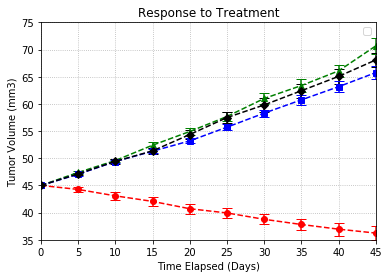

In [8]:
drugs = ['Capomulin','Ketapril','Infubinol','Placebo']
colors = ['red','green','blue','black']
markers = ['o','^','s','D']

fig, ax = plt.subplots()

for i in drugs:
    k = drugs.index(i)
    ax.errorbar(x_axis, tumor_unstack['Tumor Volume (mm3)'][i], yerr=tumor_sem[i], marker=markers[k], color=colors[k],
                       linestyle='--', capsize=5,)

ax.set_title('Response to Treatment')
ax.legend()
ax.set_xlim(0, 45)
ax.set_ylim(35, 75)
ax.grid(linestyle=':')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_xlabel('Time Elapsed (Days)')



In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met=merged_data.groupby(["Drug","Timepoint"])
mean_met=met["Metastatic Sites"].mean()
mean_met
# Convert to DataFrame
mean_met_df=pd.DataFrame(mean_met)
# Preview DataFrame
mean_met_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
standard_err_met=met["Metastatic Sites"].sem()
# Convert to DataFrame
sterr_met_df=pd.DataFrame(standard_err_met)
# Preview DataFrame
sterr_met_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
...                               ...
Zoniferol 25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [11]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_df_pivot = pd.pivot_table(mean_met_df,values='Metastatic Sites',
                                index=['Timepoint'], columns=["Drug"])
# Preview that Reformatting worked
mean_met_df_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


KeyError: 'Capomulin'

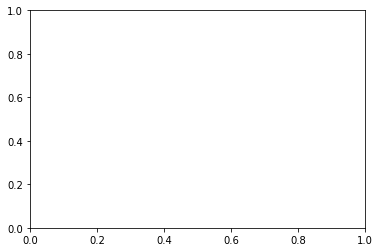

In [41]:
# Generate the Plot (with Error Bars)


drugs = ['Capomulin','Ketapril','Infubinol','Placebo']
colors = ['red','green','blue','black']
markers = ['o','^','s','D']

fig, ax = plt.subplots()

for i in drugs:
    k = drugs.index(i)
    ax.errorbar(x_axis, mean_met_unstack['Metastatic Sites'][i], yerr=sterr_met_df[i], marker=markers[k], color=colors[k],
                       linestyle='--', capsize=5,)


ax.set_title('Response to Treatment')
ax.legend()
ax.set_xlim(0, 45)
ax.set_ylim(0.0,4.0)
ax.grid(linestyle=':')
ax.set_ylabel('Metastatic Sites')
ax.set_xlabel('Time Elapsed (Days)')


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice=merged_data.groupby(["Drug","Timepoint"])
mouse_count=mice["Mouse ID"].unique()
mouse_count
# Convert to DataFrame
mouse_df=pd.DataFrame(mouse_count)

# Preview DataFrame
mouse_df

In [28]:
# Minor Data Munging to Re-Format the Data Frames

survival_rate = pd.pivot_table(merged_data, values='Tumor Volume (mm3)', columns=['Drug'], index=['Timepoint'], aggfunc='count')
sr_df = survival_rate[['Capomulin','Ketapril','Infubinol','Placebo']]

survival_rate


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


No handles with labels found to put in legend.


Text(0.5, 0, 'Time Elapsed (Days)')

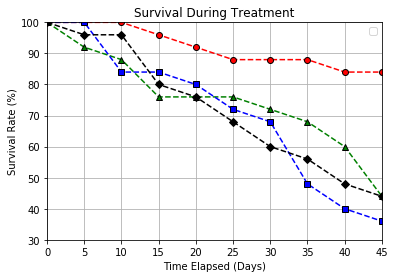

In [39]:
# Generate the Plot (Accounting for percentages)
drugs = ['Capomulin','Ketapril','Infubinol','Placebo']
colors = ['red','green','blue','black']
markers = ['o','^','s','D']

fig, ax = plt.subplots()


for i in drugs:
    n = drugs.index(i)
    ax.errorbar(x_axis, ((sr_df[i] / sr_df[i][0])*100) , marker=markers[n], color=colors[n],
                       linestyle='--', capsize=5, mec = 'black')



ax.set_title('Survival During Treatment')
ax.legend()
ax.set_xlim(0, 45)
ax.set_ylim(30, 100)
ax.grid()
ax.set_ylabel('Survival Rate (%)')
ax.set_xlabel('Time Elapsed (Days)')

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [46]:
# Calculate the percent changes for each drug
percent_change = (tumor_df_pivot.loc[45, :] - tumor_df_pivot.loc[0, :])/tumor_df_pivot.loc[0, :] * 100

# Display the data to confirm
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

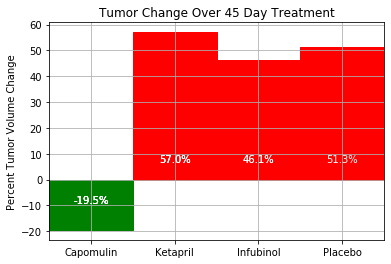

In [58]:
#Plotting the Bar Graph

summary_pt = pd.pivot_table(merged_data, values='Tumor Volume (mm3)', columns=['Drug'], index=['Timepoint'], aggfunc='mean')
summary_df = summary_pt[['Capomulin','Ketapril','Infubinol','Placebo']]
summary_pct_list = []
growth_dir = []
pct_labels = []

for i in drugs_to_plot:
    start = summary_df[i][summary_df.index[0]]
    end = summary_df[i][summary_df.index[-1]]
    summary_pct = ((end - start) / start) * 100
    summary_pct_list.append(summary_pct)
    if summary_pct > 0:
        growth_dir.append('red')
    elif summary_pct < 0:
        growth_dir.append('green')
        
summary_fig, summary_ax = plt.subplots()
find_xlim = len(summary_pct_list) -0.5
summary_bar = summary_ax.bar(drugs_to_plot, summary_pct_list, align='center',width=1)


summary_ax.set_ylabel('Percent Tumor Volume Change')
summary_ax.grid()
summary_ax.set_xlim(-0.5, find_xlim, 1)
summary_ax.set_title('Tumor Change Over 45 Day Treatment')


for i in np.arange(0,len(drugs_to_plot)):
    summary_bar[i].set_color(growth_dir[i])
    summary_bar[i].set_label(summary_pct_list[i])
    pct_labels.append(str(summary_pct_list[i].round(1))+'%')
    for bar, label in zip(summary_bar, pct_labels):
        if bar.get_height() > 0:
            height = 6
        elif bar.get_height() < 0:  
            height = -10
        summary_ax.text(bar.get_x() + bar.get_width() / 2, height, label, ha='center', va='bottom', color='white')



![Metastatic Spread During Treatment](../Images/change.png)

##Observations
1. out of the 4 drugs that were plotted, Capomulin seemed to give mice the best survival rate.
2. the tumor volume didnt change/increased for infubinol, ketapril, or the placebo
3. from the pivot table on tumor volume, it was also observed that Ramicane also had a positive effect on the decrease on tumor volume over time.